In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

# Загрузка данных

In [2]:
root_path = "/mnt/HC_Volume_18315164/home-jupyter/jupyter-n-sitenkov"


olist_customers_dataset = pd.read_csv(f"{root_path}/first_project_data/olist_customers_dataset.csv")
olist_orders_dataset = pd.read_csv(f"{root_path}/first_project_data/olist_orders_dataset.csv")
olist_order_items_dataset = pd.read_csv(f"{root_path}/first_project_data/olist_order_items_dataset.csv")


# Небольшой EDA

## olist_customers_datase.csv — таблица с уникальными идентификаторами пользователей

**customer_id** — позаказный идентификатор пользователя

**customer_unique_id** —  уникальный идентификатор пользователя  (в идеальных данных не может быть двух пользователей с одинаковым значением, является уникальным айдишником пользователя)

**customer_zip_code_prefix** —  почтовый индекс пользователя

**customer_city** —  город доставки пользователя

**customer_state** —  штат доставки пользователя

In [3]:
olist_customers_dataset.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
# Узнаем типы данных
olist_customers_dataset.dtypes.to_frame()

,0
customer_id,object
customer_unique_id,object
customer_zip_code_prefix,int64
customer_city,object
customer_state,object


In [5]:
# Считаем количество nan значений по каждой колонке
olist_customers_dataset.isna().sum().to_frame()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [6]:
# Считаем количество уникальных значений по каждой колонке
olist_customers_dataset.nunique().to_frame()

,0
customer_id,99441
customer_unique_id,96096
customer_zip_code_prefix,14994
customer_city,4119
customer_state,27


## olist_orders_dataset.csv —  таблица заказов


**order_id** —  уникальный идентификатор заказа (номер чека)

**customer_id** —  позаказный идентификатор пользователя

**order_status** —  статус заказа

**order_purchase_timestamp** —  время создания заказа

**order_approved_at** —  время подтверждения оплаты заказа

**order_delivered_carrier_date** —  время передачи заказа в логистическую службу

**order_delivered_customer_date** —  время доставки заказа

**order_estimated_delivery_date** —  обещанная дата доставки

In [7]:
olist_orders_dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
# Узнаем типы данных
olist_orders_dataset.dtypes.to_frame()

,0
order_id,object
customer_id,object
order_status,object
order_purchase_timestamp,object
order_approved_at,object
order_delivered_carrier_date,object
order_delivered_customer_date,object
order_estimated_delivery_date,object


In [9]:
# Видно, что order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, 
# order_estimated_delivery_date имеют тип данных object, преобразовываем в тип данных timestamp(<M8[ns])

olist_orders_dataset.order_purchase_timestamp = pd.to_datetime(olist_orders_dataset.order_purchase_timestamp)
olist_orders_dataset.order_approved_at = pd.to_datetime(olist_orders_dataset.order_approved_at)
olist_orders_dataset.order_delivered_carrier_date = pd.to_datetime(olist_orders_dataset.order_delivered_carrier_date)
olist_orders_dataset.order_delivered_customer_date = pd.to_datetime(olist_orders_dataset.order_delivered_customer_date)
olist_orders_dataset.order_estimated_delivery_date = pd.to_datetime(olist_orders_dataset.order_estimated_delivery_date)

In [10]:
# Узнаем снова типы данных, видим преобразованную колонки order_purchase_timestamp, order_approved_at, 
# order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date
olist_orders_dataset.dtypes.to_frame()

,0
order_id,object
customer_id,object
order_status,object
order_purchase_timestamp,datetime64[ns]
order_approved_at,datetime64[ns]
order_delivered_carrier_date,datetime64[ns]
order_delivered_customer_date,datetime64[ns]
order_estimated_delivery_date,datetime64[ns]


In [11]:
# Считаем количество nan значений по каждой колонке
olist_orders_dataset.isna().sum().to_frame()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [12]:
# Считаем количество уникальных значений по каждой колонке
olist_orders_dataset.nunique().to_frame()

,0
order_id,99441
customer_id,99441
order_status,8
order_purchase_timestamp,98875
order_approved_at,90733
order_delivered_carrier_date,81018
order_delivered_customer_date,95664
order_estimated_delivery_date,459


## olist_order_items_dataset.csv —  товарные позиции, входящие в заказы

**order_id** —  уникальный идентификатор заказа (номер чека)

**order_item_id** —  идентификатор товара внутри одного заказа (не содержит информацию о количестве товаров)

**product_id** —  уникальный идентефикатор товара (аналог штрихкода)

**seller_id** — уникальный идентефикатор производителя товара

**shipping_limit_date** —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике

**price** —  цена за единицу товара

**freight_value** —  вес товара

In [13]:
olist_order_items_dataset.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [14]:
# Узнаем типы данных
olist_order_items_dataset.dtypes.to_frame()

,0
order_id,object
order_item_id,int64
product_id,object
seller_id,object
shipping_limit_date,object
price,float64
freight_value,float64


In [15]:
# Видно, что shipping_limit_date имеет тип данных object, преобразовываем в тип данных timestamp(<M8[ns])
olist_order_items_dataset.shipping_limit_date = pd.to_datetime(olist_order_items_dataset.shipping_limit_date)

In [16]:
# Узнаем снова типы данных, видим преобразованную колонку shipping_limit_date
olist_order_items_dataset.dtypes.to_frame()

,0
order_id,object
order_item_id,int64
product_id,object
seller_id,object
shipping_limit_date,datetime64[ns]
price,float64
freight_value,float64


In [17]:
# Считаем количество nan значений по каждой колонке
olist_order_items_dataset.isna().sum().to_frame()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [18]:
# Считаем количество уникальных значений по каждой колонке
olist_order_items_dataset.nunique().to_frame()

,0
order_id,98666
order_item_id,21
product_id,32951
seller_id,3095
shipping_limit_date,93318
price,5968
freight_value,6999


In [19]:
# order_item_id тут не информативная переменная,
# но остальные явно имеют выбросы:
# price: 50% ниже 75 и 75% ниже 135 в то же время максимум 6735
# freight_value: 50% ниже 16.27 и 75% ниже 21.16 в то же время максимум 409.68

olist_order_items_dataset.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [20]:
sns.set(
    font_scale = 1,
    style      = "whitegrid",
    rc         = {"figure.figsize": (10, 5)}
)

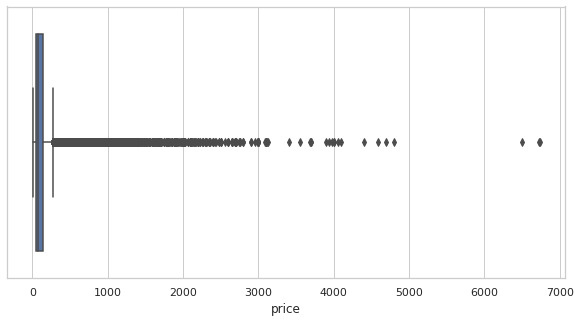

In [21]:
# Видим, что переменная price имеет большое количество выбросов особенно 2 точки между 6000 и 7000
sns.boxplot(data=olist_order_items_dataset, x="price")

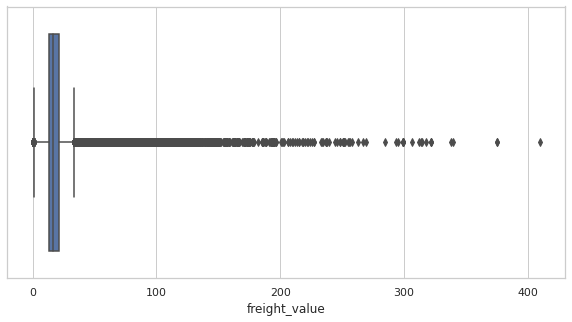

In [22]:
# Видим, что переменная freight_value имеет большое количество выбросов особенно 2 точки между 350 и 410
sns.boxplot(data=olist_order_items_dataset, x="freight_value")

# Задания

# 1. Сколько у нас пользователей, которые совершили покупку только один раз?

**order_status**:

created —  создан
<br>
approved —  подтверждён
<br>
invoiced —  выставлен счёт
<br>
processing —  в процессе сборки заказа
<br>
shipped —  отгружен со склада
<br>
delivered —  доставлен пользователю
<br>
unavailable —  недоступен
<br>
canceled —  отменён

Решение 1(через статусы).

Какие статусы оставляем, а какие нет(будем считать что люди платят только онлайн, а не в офлайн режиме когда курьер пришел или человек сам вышел за заказом и не заплатил на месте, иначе будет разница):
* created - не подходит так, как этот статус означает что человек не факт что заплатил за товар а просто создалась заявка
* approved - подтверждена заявка в плане доставки оплаченного товара
* invoiced - не подходит так, как человек не оплатил все еще, покупка не совершена
* processing - после approved так как его начали готовить
* shipped - во время processing, то есть его везут в пункт выдачи
* delivered - человеку доставили оплаченный товар
* unavailable - товар оказался не доступным по тем или иным причинам после оплаты
* canceled - да, отменен, но отменить можно только оплаченный товар

In [23]:
# Присоединяем датафреймы потому что нужен customer_unique_id, потому что я заметил что на каждый customer_id соответствует 1 
# order_id, так как он показанный, поэтому групироваться будем по уникальному id пользователя.
# По inner присоединяем, так как либо статус пропадет либо уникальный айди пользователя, поэтому нет смысла тут использовать 
# left или right джойны, тем более, что inner не привел к потере данных
joined_data_cus_ord = olist_customers_dataset.merge(olist_orders_dataset, how="inner", on="customer_id")

olist_orders_dataset_lst = joined_data_cus_ord[joined_data_cus_ord["order_status"].isin(["approved",
                                                                                         "processing",
                                                                                         "shipped",
                                                                                         "delivered",
                                                                                         "unavailable",
                                                                                         "canceled"])]

agg_oodd = olist_orders_dataset_lst.groupby("customer_unique_id", as_index=False)\
                                   .agg({"order_id": "count"})

res_1 = agg_oodd[agg_oodd["order_id"] == 1].customer_unique_id.count()
print(res_1, "пользователей, которые совершили покупку только один раз.")

92813 пользователей, которые совершили покупку только один раз.


Решение 2(через время подтверждения оплаты заказа).

Что бы мы не говорили, но время время подтверждения заказа говорит нам о том, что заказ оплачен, а значит покупка совершена.

In [24]:
# order_approved_at - время подтверждения оплаты заказа
# Просто забираем все не nan значения order_approved_at, что означает что товар оплачен, иначе нет
olist_orders_dataset_dt = joined_data_cus_ord[~joined_data_cus_ord.order_approved_at.isna()]


agg_dt = olist_orders_dataset_dt.groupby("customer_unique_id", as_index=False)\
                                .agg({"order_id": "count"})

res_2 = agg_dt[agg_dt["order_id"] == 1].customer_unique_id.count()
print(res_2, "пользователей, которые совершили покупку только один раз.")

93049 пользователей, которые совершили покупку только один раз.


Выше я предложил 2 решения, ответы сильно не отличаются, но все же 2й способ считаю более логичным и простым, просто хотел попробовать решить задачу 2мя способами и их показать.

# 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

По каким причинам может быть не доставлен товар?

По сути по любым приинам, но рассмотрим подробнее: 
* во время выгрузки товара 
* он может затеряться во время передачи его в логистическую службу
* курьер его может потерять
* товар неожиданно может заполнится
* товар может задержаться надолго по тем или иным причинам
* и т.д.

В нашем случае мы должны обратить внимание на даты в olist_orders_dataset, а точнее на их nan.

In [25]:
# Снова посмотрим на количество nan в olist_orders_dataset.
# Мы видем что "время передачи заказа в логистическую службу"(order_delivered_carrier_date) и 
# "время доставки заказа"(order_delivered_customer_date) содержат nan

olist_orders_dataset.isna().sum().to_frame()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


Посчитаем сколько было задержек доставок:
<br>
Это разница оценочной доставки и фактической.
<br>
Учитывать эти данные в текущем задании не будем, потому что вскоре эти товары будут доставлены, 
а нас интересуют совсем не доставленные товары.

In [26]:
lst_delta_dates = (olist_orders_dataset["order_estimated_delivery_date"] - \
                   olist_orders_dataset["order_delivered_customer_date"]).dropna().astype(int)

print("Количество вовремя доставленных товаров: ", sum(lst_delta_dates >= 0))
print("Количество не вовремя доставленных товаров: ", sum(lst_delta_dates < 0))

Количество вовремя доставленных товаров:  88649
Количество не вовремя доставленных товаров:  7827


Посмотрим с какими статусами связаны наши nan.
<br>
Для начала, товар не может быть не доставлен для клиента, если за него не заплатили.

In [27]:
olist_orders_dataset_paid = olist_orders_dataset[~olist_orders_dataset.order_approved_at.isna()]

st_df = olist_orders_dataset_paid[olist_orders_dataset_paid.order_delivered_carrier_date.isna()].copy()

st_df.order_status.value_counts().to_frame()

,order_status
unavailable,609
canceled,409
invoiced,314
processing,301
approved,2
delivered,2


Видно, что преимущественно, товары не доставляются из-за того что, что-то не то происходит в процессах:

* unavailable - недоступен
* canceled —  отменён
* processing —  в процессе сборки заказа
* invoiced —  выставлен счёт

[Text(0.5, 1.0, 'Гистограмма числа заказов в зависимости от статусов заказа')]

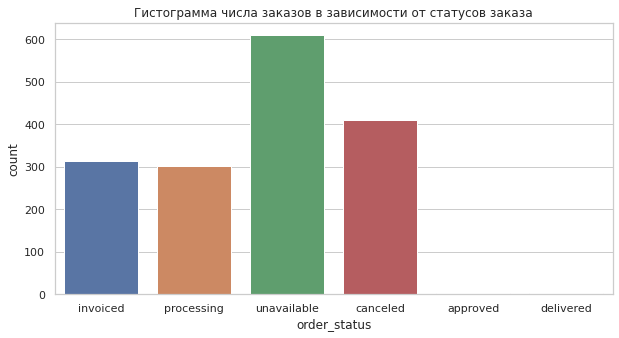

In [28]:
ax = sns.countplot(data=st_df, x="order_status")
ax.set(title='Гистограмма числа заказов в зависимости от статусов заказа')

На гистограмме заметно что количество delivered и approved крайне мало, возможно это связано с ошибками на стороне курьера или по иным причинам.

Теперь посмотрим сколько заказов в месяц в среднем не доставляется по разным причинам:
<br>
за месяц возьмем order_estimated_delivery_date, так как это ожидаемое врем получение товара клиентом и именно в это время клиент либо получает товар, либо нет 

In [29]:
st_df["year_month"] = pd.to_datetime(st_df['order_estimated_delivery_date']).dt.to_period('M')

[Text(0.5, 1.0, 'Гистограмма числа заказов в зависимости от времени и статусов заказа')]

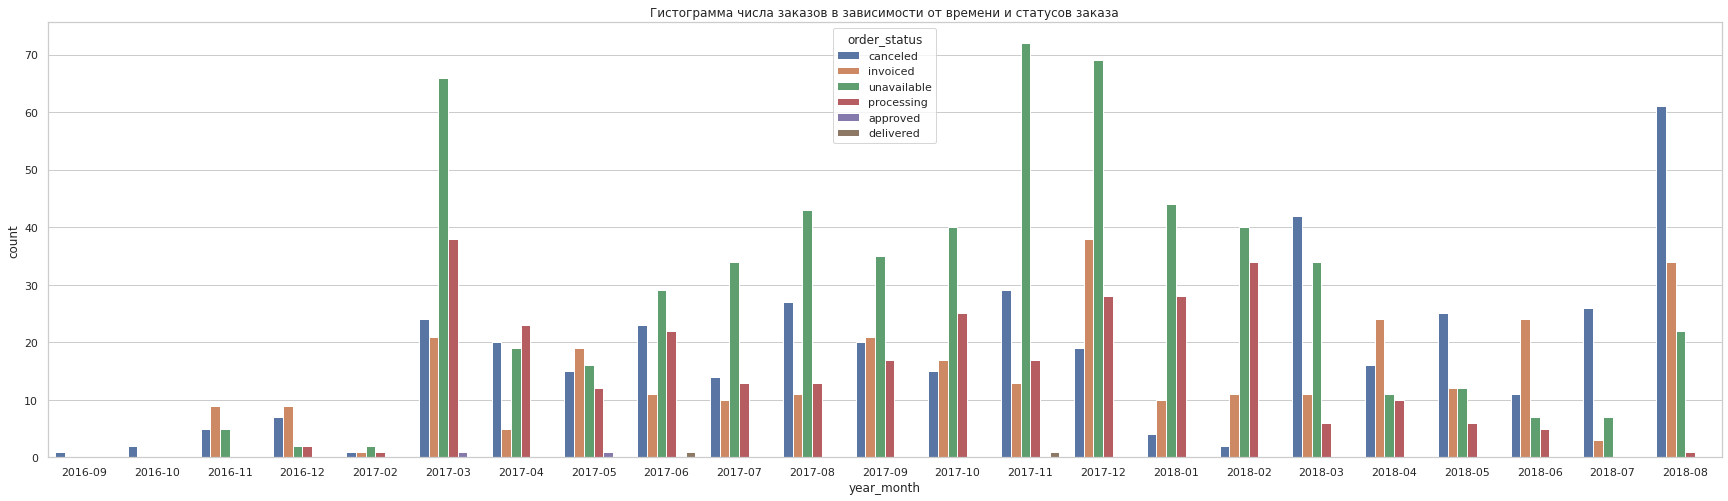

In [30]:
sns.set(
    font_scale = 1,
    style      = "whitegrid",
    rc         = {"figure.figsize": (30, 8)}
)


ax = sns.countplot(data=st_df.sort_values(by="year_month"), x="year_month", hue="order_status")
ax.set(title='Гистограмма числа заказов в зависимости от времени и статусов заказа')

In [31]:
# Количество не дотавленных товаров в месяц в среднем
(st_df.order_status.value_counts() / st_df["year_month"].nunique()).round(2).to_frame()

,order_status
unavailable,26.48
canceled,17.78
invoiced,13.65
processing,13.09
approved,0.09
delivered,0.09


Теперь необходимо выяснить, а какие статусы точно будут говорить о том, что товары не будут или не были доставлены, а какие скорее будут означать доставку чуть попозже по тем или иным причинам:

* unavailable - по данной причине действительно не могут быть доставлены товары, так как они стали не доступны
* canceled - очевидно что не могут по данной причине так как клиент отказался от товара
* invoiced - может быть каким-то багом, но не факт что товар не доставят
* processing - тут товар в процессе, возможно товар может где-то задержаться, то есть не факт что товар не доставят
* delivered - возможно неисправность в приложении, или доставщик возможно забыл указать что он доставил или другие причины
* approved - возможно тоже неисправность в приложении или другие причины

В итоге необходимо учесть только unavailable и canceled:

* По причине unavailable: 26.48 в среднем товаров в месяц
* По причине canceled: 17.78 в среднем товаров в месяц

## 3. По каждому товару определить, в какой день недели товар чаще всего покупается.

* Мерджим olist_order_items_dataset и olist_orders_dataset по order_id
* Берем товары оплата за которые была подтвеждена order_approved_at
* Формируем даты с запланированной даты доставки

In [32]:
merged_or_dt = olist_order_items_dataset.merge(olist_orders_dataset, on="order_id", how="inner")
merged_or_dt = merged_or_dt[~merged_or_dt.order_approved_at.isna()]
merged_or_dt["week"] = merged_or_dt['order_estimated_delivery_date'].dt.strftime('%A')

Группируемся по product_id и week, считаем количество таких товаров и сортируем по product_id

In [33]:
gr_merged_or_dt = merged_or_dt\
                 .groupby(["product_id", "week"], as_index=False)\
                 .agg({"order_id": "count"})\
                 .sort_values(by="product_id")

Видим дубли на максимумы по некоторым id, соответственно использовать просто max не выйдет

In [34]:
gr_merged_or_dt.head(20)

,product_id,week,order_id
0,00066f42aeeb9f3007548bb9d3f33c38,Wednesday,1
1,00088930e925c41fd95ebfe695fd2655,Friday,1
2,0009406fd7479715e4bef61dd91f2462,Tuesday,1
3,000b8f95fcb9e0096488278317764d19,Friday,1
4,000b8f95fcb9e0096488278317764d19,Monday,1
5,000d9be29b5207b54e86aa1b1ac54872,Monday,1
6,0011c512eb256aa0dbbb544d8dffcf6e,Friday,1
7,00126f27c813603687e6ce486d909d01,Monday,1
8,00126f27c813603687e6ce486d909d01,Wednesday,1
11,001795ec6f1b187d37335e1c4704762e,Thursday,3


Для подчета дублей на максимум используем выражение ниже

In [35]:
res_df_3 = gr_merged_or_dt[gr_merged_or_dt['order_id'] == gr_merged_or_dt.groupby('product_id')['order_id'].transform('max')]

Датафрейм довольно большой и честно говоря не понимаю как можно это понятно визуализировать, поэтому оставлю просто head(10) от результирующего датафрейма

In [36]:
res_df_3.head(10)

,product_id,week,order_id
0,00066f42aeeb9f3007548bb9d3f33c38,Wednesday,1
1,00088930e925c41fd95ebfe695fd2655,Friday,1
2,0009406fd7479715e4bef61dd91f2462,Tuesday,1
3,000b8f95fcb9e0096488278317764d19,Friday,1
4,000b8f95fcb9e0096488278317764d19,Monday,1
5,000d9be29b5207b54e86aa1b1ac54872,Monday,1
6,0011c512eb256aa0dbbb544d8dffcf6e,Friday,1
7,00126f27c813603687e6ce486d909d01,Monday,1
8,00126f27c813603687e6ce486d909d01,Wednesday,1
11,001795ec6f1b187d37335e1c4704762e,Thursday,3


## 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.

* Присоединяем датафреймы потому что нужен customer_unique_id
* Берем товары оплата за которые была подтвеждена order_approved_at

In [37]:
joined_data_cus_ord = olist_customers_dataset.merge(olist_orders_dataset, how="inner", on="customer_id")
olist_orders_dataset_dt = joined_data_cus_ord[~joined_data_cus_ord.order_approved_at.isna()].copy()

* Считаем среднее количество недель в месяце
* Формируем колонку с месяцами

In [38]:
olist_orders_dataset_dt["num_weeks_in_month"] = olist_orders_dataset_dt["order_estimated_delivery_date"]\
                                                .apply(lambda x: x.days_in_month) / 7

olist_orders_dataset_dt["month"] = olist_orders_dataset_dt['order_estimated_delivery_date'].dt.strftime('%B')

* Группируем данные по customer_unique_id и month и считаем order_id и получаем gr_oddd
* Мерджим gr_oddd и olist_orders_dataset_dt только с колонками num_weeks_in_month и month удалив дупликаты, так как необходимо подсчитать avg_purchases
* Считаем avg_purchases

In [39]:
gr_oddd = olist_orders_dataset_dt.groupby(["customer_unique_id", "month"], as_index=False).agg({"order_id": "count"})
gr_oddd = gr_oddd.merge(olist_orders_dataset_dt[["num_weeks_in_month", "month"]].drop_duplicates(), on="month", how="inner")
gr_oddd["avg_purchases"] = (gr_oddd["order_id"] / gr_oddd["num_weeks_in_month"]).round(2)

df_res_4 = gr_oddd[["customer_unique_id", "avg_purchases"]]

[Text(0.5, 1.0, 'Гистограмма среднего числа покупок в неделю по месяцам')]

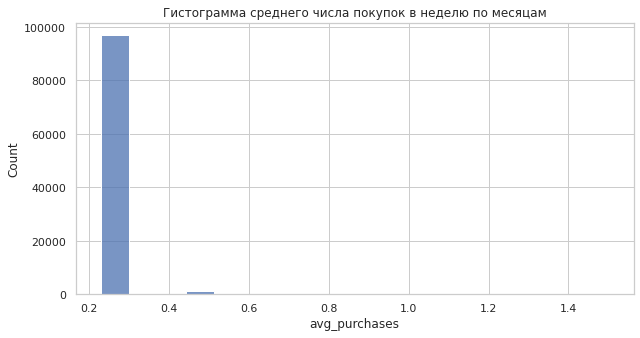

In [40]:
sns.set(
    font_scale = 1,
    style      = "whitegrid",
    rc         = {"figure.figsize": (10, 5)}
)


ax = sns.histplot(data=df_res_4, x="avg_purchases")
ax.set(title='Гистограмма среднего числа покупок в неделю по месяцам')

На гистограмме видно, что люди преимущественно 0.23 в неделю.

Как результат представлю первые 20 строк датафрейма

In [41]:
df_res_4.head(20)

,customer_unique_id,avg_purchases
0,0000366f3b9a7992bf8c76cfdf3221e2,0.23
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0.23
2,00050ab1314c0e55a6ca13cf7181fecf,0.23
3,000949456b182f53c18b68d6babc79c1,0.23
4,000ed48ceeb6f4bf8ad021a10a3c7b43,0.23
5,0011805441c0d1b68b48002f1d005526,0.23
6,00191a9719ef48ebb5860b130347bf33,0.23
7,002043098f10ba39a4600b6c52fbfe3c,0.23
8,0034c76b7e6a17d738375b99afc2f01e,0.23
9,0035029989e6fc5cf030918a5f9f2037,0.23


## 5. Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц.

* Мерджим olist_order_items_dataset и olist_orders_dataset по order_id
* Берем товары оплата за которые была подтвеждена order_approved_at

In [42]:
joined_data_cus_ord = olist_customers_dataset.merge(olist_orders_dataset, how="inner", on="customer_id")
joined_data_cus_ord = joined_data_cus_ord[~joined_data_cus_ord.order_approved_at.isna()]

Преобразуем наши даты в первые даты месяцев

In [43]:
joined_data_cus_ord["first_dates_months"] = pd.to_datetime(joined_data_cus_ord['order_estimated_delivery_date'])\
                                              .astype("datetime64[M]")

Обрезаем нужные колонки

In [44]:
joined_data_cut = joined_data_cus_ord[["customer_unique_id", "first_dates_months"]]

Находим первую дату покупки

In [45]:
gr_min_date = joined_data_cut.groupby("customer_unique_id", as_index=False).agg({"first_dates_months": "min"})
gr_min_date = gr_min_date.rename(columns={"first_dates_months": "start_date"})
gr_min_date.head()

,customer_unique_id,start_date
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-01
2,0000f46a3911fa3c0805444483337064,2017-04-01
3,0000f6ccb0745a6a4b88665a16c9f078,2017-11-01
4,0004aac84e0df4da2b147fca70cf8255,2017-12-01


Мерджим два датафрейма для того чтобы вычитать было удобно

In [46]:
merged_data_cus = joined_data_cus_ord.merge(gr_min_date, how="inner", on="customer_unique_id")
merged_data_cus.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,first_dates_months,start_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2017-06-01,2017-06-01
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,2018-02-01,2018-02-01
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,2018-06-01,2018-06-01
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,2018-04-01,2018-04-01
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,2018-08-01,2018-08-01


Находим разницу между датами первой и следующих покупок

In [47]:
merged_data_cus["delta_months"] = ((merged_data_cus["first_dates_months"] - merged_data_cus["start_date"])\
                                  / np.timedelta64(1, 'M')).round().astype(int)
merged_data_cus.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,first_dates_months,start_date,delta_months
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2017-06-01,2017-06-01,0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,2018-02-01,2018-02-01,0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,2018-06-01,2018-06-01,0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,2018-04-01,2018-04-01,0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,2018-08-01,2018-08-01,0


In [48]:
# Находим количество уникальных пользователей в группе start_date и delta_months
cohorts_ord_un = merged_data_cus.groupby(['start_date', 'delta_months'], as_index=False)\
                                .agg({'customer_unique_id': 'nunique'})

 # Находим количество уникальных пользователей в группе start_date и delta_months c учетом только первых заказов
cohorts_ord_un_f = cohorts_ord_un[cohorts_ord_un["delta_months"] == 0]

cohorts_ord_un_f = cohorts_ord_un_f.rename(columns={"delta_months": "delta_months_f",
                                                    "customer_unique_id": "num_unique_cus_total"})

cohorts_ord_un = cohorts_ord_un.rename(columns={"customer_unique_id": "num_unique_cus"}) 

In [49]:
cohorts_ord_un.head()

,start_date,delta_months,num_unique_cus
0,2016-09-01,0,1
1,2016-10-01,0,5
2,2016-10-01,12,1
3,2016-10-01,21,1
4,2016-11-01,0,165


In [50]:
cohorts_ord_un_f.head()

,start_date,delta_months_f,num_unique_cus_total
0,2016-09-01,0,1
1,2016-10-01,0,5
4,2016-11-01,0,165
11,2016-12-01,0,146
14,2017-01-01,0,3


In [51]:
# Мерджим получившиеся таблицы
merged_coh = cohorts_ord_un.merge(cohorts_ord_un_f, on="start_date", how="inner")
# Находим отношение между num_unique_cus и num_unique_cus_total
merged_coh["proportin_cus"] = 100 * merged_coh["num_unique_cus"] / merged_coh["num_unique_cus_total"]
# Отсекаем нужные колонки
merged_coh = merged_coh[["start_date", "delta_months", "proportin_cus"]]
# Преобразовываем в год и месяц для удобства визуализации
merged_coh["start_date"] = pd.to_datetime(merged_coh['start_date']).dt.to_period('M')
merged_coh.rename(columns={"start_date": "year_month_cohort"})

# Формируем сводную таблицу
pivot_data = merged_coh.pivot(columns='delta_months', index='start_date', values="proportin_cus")
pivot_data

delta_months,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,21
start_date,,,,,,,,,,,,,,,,,,,,,
2016-09,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,20.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0
2016-11,100.0,0.606061,NaN,NaN,NaN,NaN,0.606061,NaN,NaN,0.606061,...,NaN,NaN,NaN,0.606061,NaN,NaN,0.606061,1.212121,NaN,NaN
2016-12,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.684932,NaN,NaN,NaN,NaN,NaN,NaN,0.684932,NaN
2017-01,100.0,33.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02,100.0,1.677852,NaN,1.006711,0.335570,NaN,0.671141,NaN,NaN,NaN,...,NaN,0.671141,NaN,NaN,NaN,NaN,0.335570,NaN,0.335570,NaN
2017-03,100.0,0.512821,0.183150,0.402930,0.183150,0.219780,0.256410,0.146520,0.073260,0.256410,...,0.366300,0.256410,0.183150,0.183150,0.036630,0.109890,0.146520,NaN,NaN,NaN
2017-04,100.0,1.137915,0.318616,0.455166,0.227583,0.045517,0.227583,0.364133,0.182066,0.227583,...,0.136550,0.182066,0.182066,0.136550,0.273100,0.227583,0.091033,NaN,NaN,NaN
2017-05,100.0,0.776765,0.405268,0.270179,0.303951,0.270179,0.270179,0.472813,0.135089,0.236407,...,0.135089,0.135089,0.033772,0.135089,0.202634,0.101317,NaN,NaN,NaN,NaN


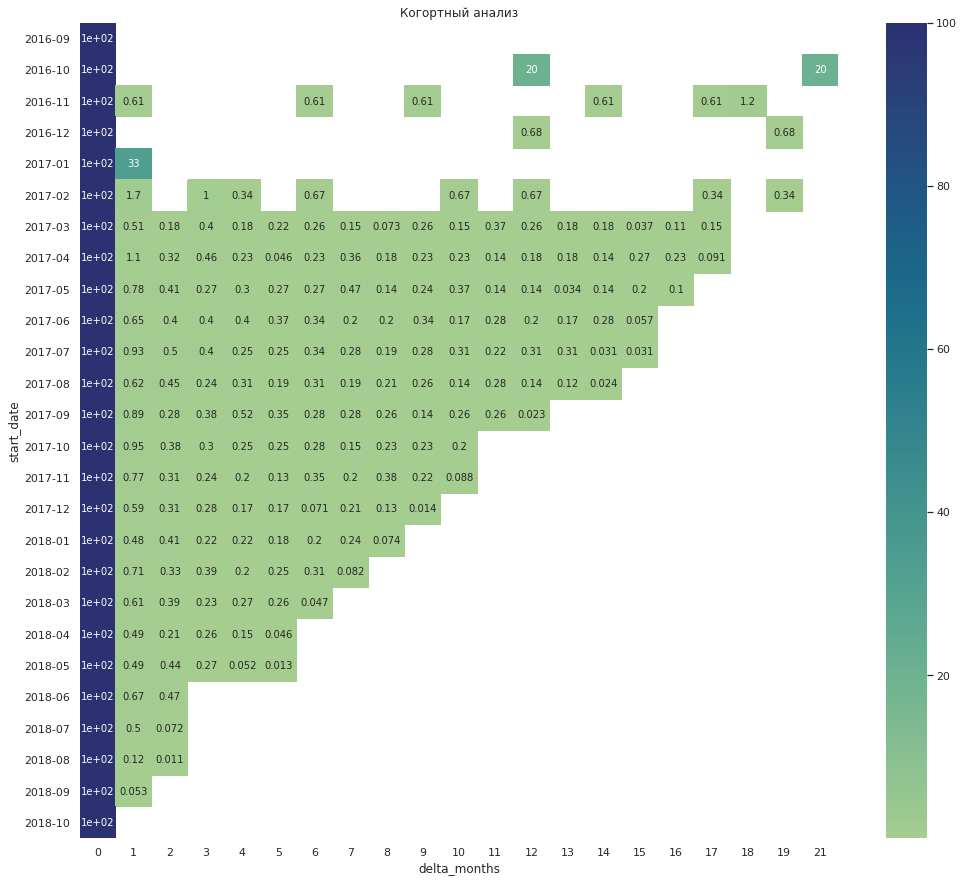

In [52]:
sns.set(
    font_scale = 1,
    style      = "whitegrid",
    rc         = {"figure.figsize": (17, 15)}
)

ax = sns.heatmap(pivot_data, 
                 cmap='crest', 
                 annot=True,
                 annot_kws={"fontsize": 10},
  )

ax.set_title("Когортный анализ")

plt.show()

Нас интересует столбец под номером 3, поэтому самый высокий retention наблюдается 2017-04

## 6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. 

In [53]:
joined_data_cus_ord = olist_customers_dataset.merge(olist_orders_dataset, how="inner", on="customer_id")
joined_data_cus_ord = joined_data_cus_ord[~joined_data_cus_ord.order_approved_at.isna()]
data_cus_it_ord = joined_data_cus_ord.merge(olist_order_items_dataset, how="inner", on="order_id")

# Забираем нужные колонки
data_cus_it_ord = data_cus_it_ord[['customer_unique_id', 'order_id', 'order_approved_at', 'price']]

# Последняя покупка была 2018-09, следовательно за начальную дату возьмем следующую после последней оплаты.
now_dt = data_cus_it_ord['order_approved_at'].max() + timedelta(days=1)

def calc_func(x):
    return (now_dt - x.max()).days

# Сгруппируем полученный датафрейм по уникальным пользователям, после чего рассчитаем Recency, Frequency и Monetary.
rfm_df = data_cus_it_ord.groupby('customer_unique_id', as_index=False).agg({'order_approved_at': calc_func, 
                                                                            'order_id': 'count', 
                                                                            'price': 'sum'})

rfm_df = rfm_df.rename(columns={'order_approved_at': 'Recency', 
                                'order_id': 'Frequency', 
                                'price': 'Monetary'})

# Проведем разбиение по квантилям 

In [54]:
rfm_df["Recency"].value_counts().to_frame().head(10)

,Recency
132,1066
283,872
61,634
284,593
280,516
119,437
28,435
273,413
35,390
118,384


In [55]:
rfm_df["Monetary"].value_counts().to_frame().head(10)

,Monetary
59.90,1609
69.90,1502
49.90,1341
89.90,1156
99.90,1135
79.90,941
39.90,908
29.90,897
19.90,869
29.99,831


In [56]:
rfm_df["Frequency"].value_counts().to_frame().head(10)

,Frequency
1,83540
2,8994
3,1672
4,632
5,254
6,198
7,46
8,16
9,11
10,11


В целом, в Recency и Monetary можно разбить по квантилям, а вот Frequency судя по датафрейму выше придется в ручную: 1, 2, 3, 6

In [57]:
rfm_s = rfm_df[['Recency','Monetary']].quantile([.2, .4, .6, .8])
rfm_s["Frequency"] = [1, 2, 3, 6]

q_dict = rfm_s.to_dict()

In [58]:
q_dict

{'Recency': {0.2: 98.0, 0.4: 182.0, 0.6: 273.0, 0.8: 389.0},
 'Monetary': {0.2: 39.9, 0.4: 69.9, 0.6: 109.9, 0.8: 179.9},
 'Frequency': {0.2: 1, 0.4: 2, 0.6: 3, 0.8: 6}}

In [59]:
def r_score_func(x):
    if x <= q_dict['Recency'][.2]:
        return 5
    elif x <= q_dict['Recency'][.4]:
        return 4
    elif x <= q_dict['Recency'][.6]:
        return 3
    elif x <= q_dict['Recency'][.8]:
        return 2
    else:
        return 1

def fm_score_func(x, t):
    if x <= q_dict[t][.2]:
        return 1
    elif x <= q_dict[t][.4]:
        return 2
    elif x <= q_dict[t][.6]:
        return 3
    elif x <= q_dict[t][.8]:
        return 4
    else:
        return 5  

Считаем R, F и M, после чего скрепляем это все построково в RFM

In [60]:
rfm_df['R'] = rfm_df['Recency'].apply(lambda x: r_score_func(x))
rfm_df['F'] = rfm_df['Frequency'].apply(lambda x: fm_score_func(x, 'Frequency'))
rfm_df['M'] = rfm_df['Monetary'].apply(lambda x: fm_score_func(x, 'Monetary'))


rfm_df['RFM'] = rfm_df.R.map(str) + rfm_df.F.map(str) + rfm_df.M.map(str)

rfm_df.head()

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM
0,0000366f3b9a7992bf8c76cfdf3221e2,117,1,129.90,4,1,4,414
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,4,1,1,411
2,0000f46a3911fa3c0805444483337064,542,1,69.00,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00,2,1,5,215


In [61]:
rfm_df.shape

(95407, 8)

In [62]:
rfm_df.RFM.nunique()

112

Итого вышло 112 сегметов

Text(0.5, 1.0, 'Распределение RFM сигментов')

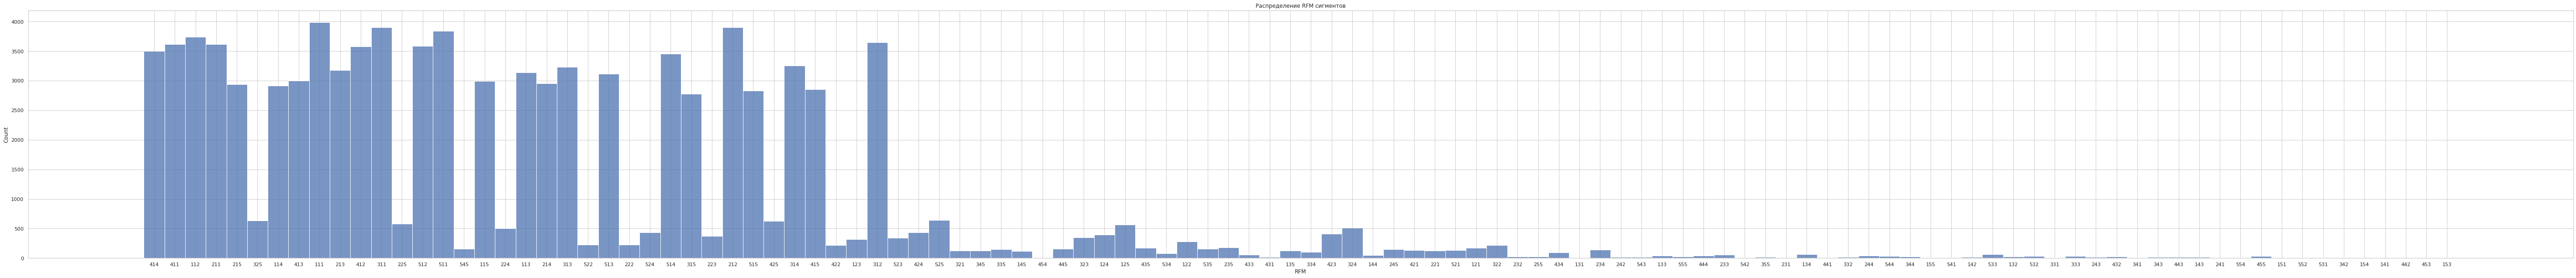

In [63]:
sns.set(
    font_scale = 1,
    style      = "whitegrid",
    rc         = {"figure.figsize": (100, 10)}
)

ax = sns.histplot(data=rfm_df, x="RFM")
ax.set_title("Распределение RFM сигментов")

Ниже воспользуемся предложенной ссылкой к заданию и сделаем несколько визуализаций к заданию

In [64]:
segt_map = {
    r'[1-2][1-2]': 'Неактивные',
    r'[1-2][3-4]': 'В зоне риска',
    r'[1-2]5': 'Нужно сохранить',
    r'3[1-2]': 'Слабоактивные',
    r'33': 'Нужно обратить внимание',
    r'[3-4][4-5]': 'Лояльные клиенты',
    r'41': 'Многообещающие',
    r'51': 'Новые клиенты',
    r'[4-5][2-3]': 'Потенциальные лояльные пользователи',
    r'5[4-5]': 'Лучшие пользователи'
}

rfm_df['Segment'] = rfm_df['R'].map(str) + rfm_df['F'].map(str)
rfm_df['Segment'] = rfm_df['Segment'].replace(segt_map, regex=True)
rfm_df.head()

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM,Segment
0,0000366f3b9a7992bf8c76cfdf3221e2,117,1,129.90,4,1,4,414,Многообещающие
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,4,1,1,411,Многообещающие
2,0000f46a3911fa3c0805444483337064,542,1,69.00,1,1,2,112,Неактивные
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,2,1,1,211,Неактивные
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00,2,1,5,215,Неактивные


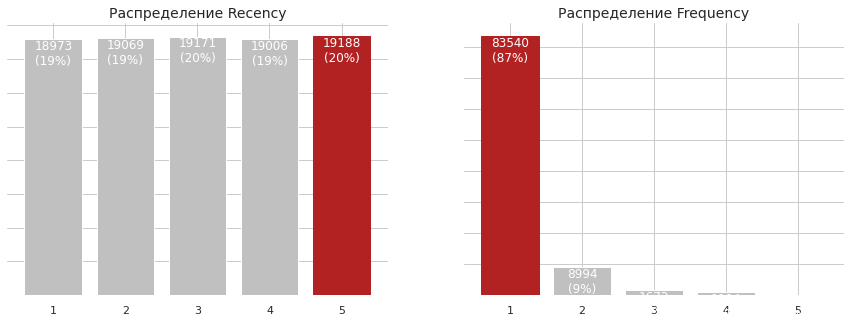

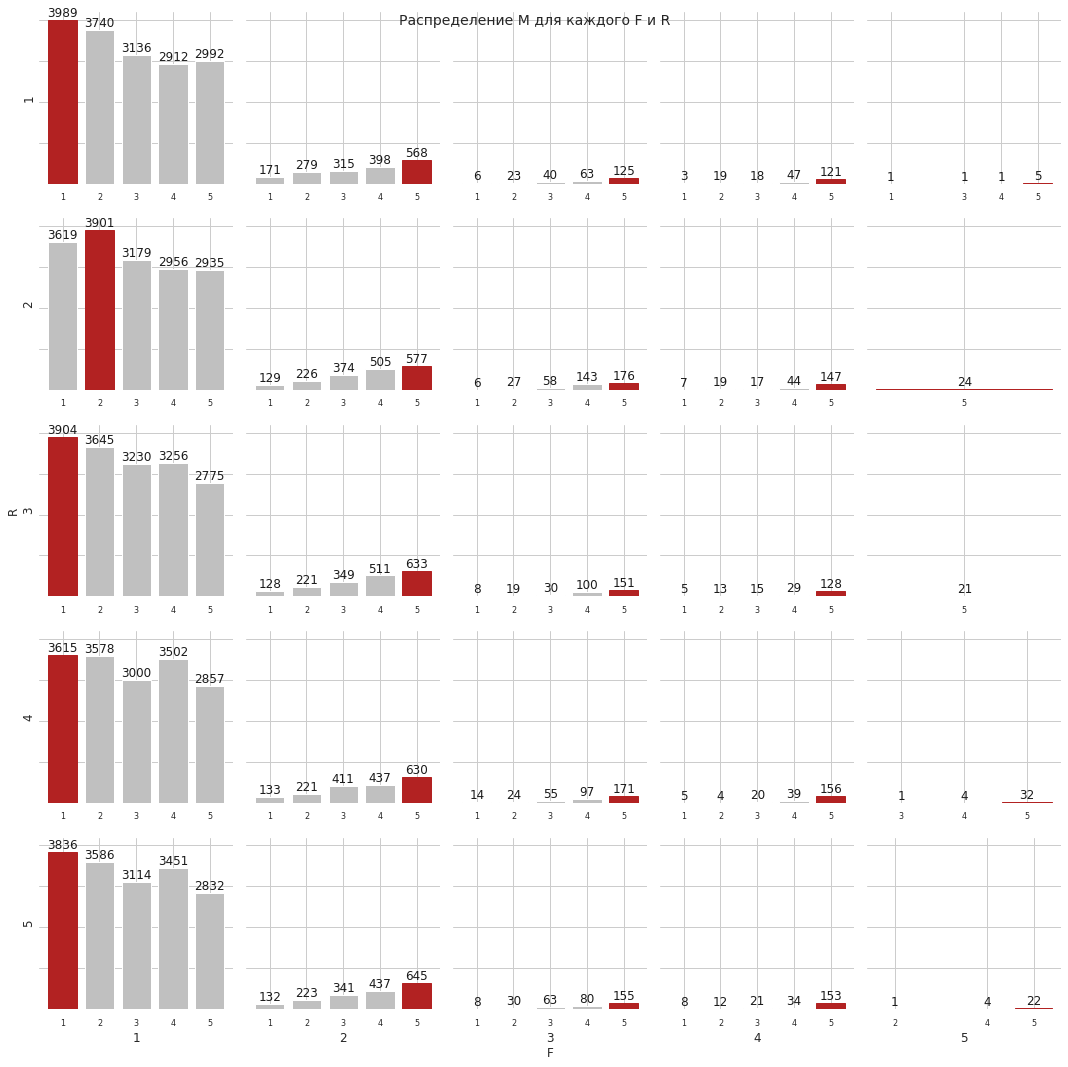

In [65]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

for i, p in enumerate(['R', 'F']):
    parameters = {'R':'Recency', 'F':'Frequency'}
    y = rfm_df[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color='silver')
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Распределение {}'.format(parameters[p]),
                fontsize=14)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('firebrick')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 5,
                '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
               ha='center',
               va='top',
               color='w')

plt.show()



fig, axes = plt.subplots(nrows=5, ncols=5,
                         sharex=False, sharey=True,
                         figsize=(15, 15))

r_range = range(1, 6)
f_range = range(1, 6)
for r in r_range:
    for f in f_range:
        y = rfm_df[(rfm_df['R'] == r) & (rfm_df['F'] == f)]['M'].value_counts().sort_index()
        x = y.index
        ax = axes[r - 1, f - 1]
        bars = ax.bar(x, y, color='silver')
        if r == 5:
            if f == 3:
                ax.set_xlabel('{}\nF'.format(f), va='top')
            else:
                ax.set_xlabel('{}\n'.format(f), va='top')
        if f == 1:
            if r == 3:
                ax.set_ylabel('R\n{}'.format(r))
            else:
                ax.set_ylabel(r)
        ax.set_frame_on(False)
        ax.tick_params(left=False, labelleft=False, bottom=False)
        ax.set_xticks(x)
        ax.set_xticklabels(x, fontsize=8)

        for bar in bars:
            value = bar.get_height()
            if value == y.max():
                bar.set_color('firebrick')
            ax.text(bar.get_x() + bar.get_width() / 2,
                    value,
                    int(value),
                    ha='center',
                    va='bottom',
                    color='k')
fig.suptitle('Распределение M для каждого F и R',
             fontsize=14)
plt.tight_layout()
plt.show()

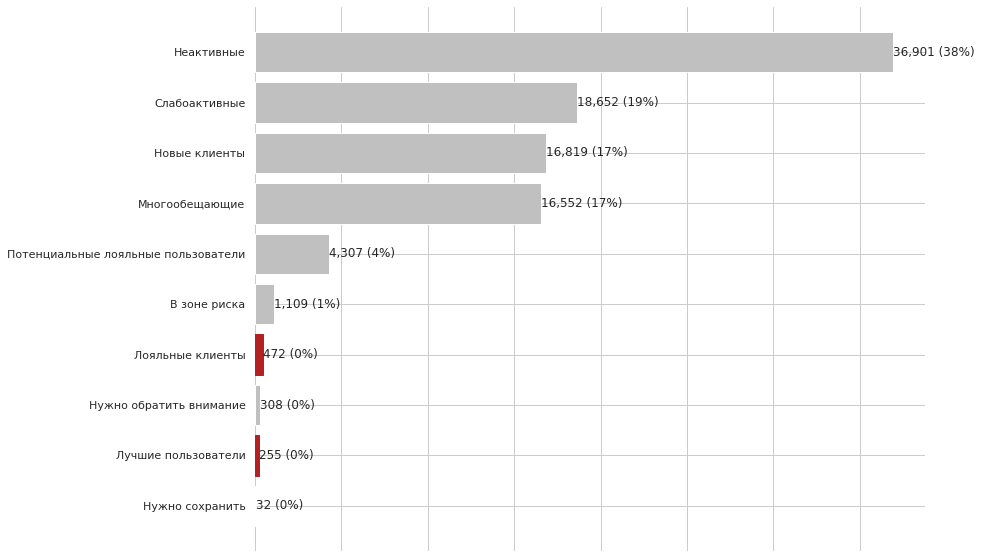

In [66]:
sns.set(
    font_scale = 1,
    style      = "whitegrid",
    rc         = {"figure.figsize": (12, 10)}
)

segments_counts = rfm_df['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['Лучшие пользователи', 'Лояльные клиенты']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

* Больше трети клиентов у нас совершило только одну покупку
* Также у нас 19% слабоактивных клиентов, 18% новых клиентов и 17% многообещающих

Для 4х котегорий выше необходимо давать скидки и разными способами привлекать к новым покупкам.
<br>
Лояльных клиентов и лучших пользователей у нас, к сожалению, мало